In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pygv.viewer import GenomeViewer
from pygv.tracks import bigwig_track

In [ ]:
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")
from customized_styles import BuYl, _pos_color, _neg_color
from utils import get_bioqueue_file

In [4]:
gv_obj = GenomeViewer(inward_ticks=True, n_ticks=3)
_target = bigwig_track.PairedStrandSpecificTracks(
    get_bioqueue_file("{{CrossAccess:13-343-K562_GROcap_hg38_aligned_pl.bw}}"),
    get_bioqueue_file("{{CrossAccess:13-343-K562_GROcap_hg38_aligned_mn.bw}}"),
    name="Initiation", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
)
gv_obj.add_track(_target)

_target = bigwig_track.PairedStrandSpecificTracks(
    get_bioqueue_file("{{CrossAccess:13-359-K562_PROseq_merged_hg38_aligned_pl.bw}}"),
    get_bioqueue_file("{{CrossAccess:13-359-K562_PROseq_merged_hg38_aligned_mn.bw}}"),
    name="Pause-\nrelease", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
)
gv_obj.add_track(_target)

_target = bigwig_track.BigWigTrack(
    "https://www.encodeproject.org/files/ENCFF806YEZ/@@download/ENCFF806YEZ.bigWig",
    name="H3K4me3", height=0.6,
    color="#b5e48c", y_tick_format="{:0.1f}",
)
gv_obj.add_track(_target)

_target = bigwig_track.BigWigTrack(
    "https://www.encodeproject.org/files/ENCFF849TDM/@@download/ENCFF849TDM.bigWig",
    name="H3K27ac", height=0.6,
    color="#99d98c", y_tick_format="{:0.1f}",
)
gv_obj.add_track(_target)

_target = bigwig_track.BigWigTrack(
    "https://www.encodeproject.org/files/ENCFF399SGM/@@download/ENCFF399SGM.bigWig",
    name="H3K4me1", height=0.6,
    color="#76c893", y_tick_format="{:0.1f}",
)
gv_obj.add_track(_target)

_target = bigwig_track.BigWigTrack(
    "https://www.encodeproject.org/files/ENCFF102ARJ/@@download/ENCFF102ARJ.bigWig",
    name="Accessibility", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6,
)
gv_obj.add_track(_target)

array([<Axes: title={'center': 'chrX'}, ylabel='Initiation'>,
       <Axes: ylabel='Pause-\nrelease'>, <Axes: ylabel='H3K4me3'>,
       <Axes: ylabel='H3K27ac'>, <Axes: ylabel='H3K4me1'>,
       <Axes: ylabel='Accessibility'>], dtype=object)

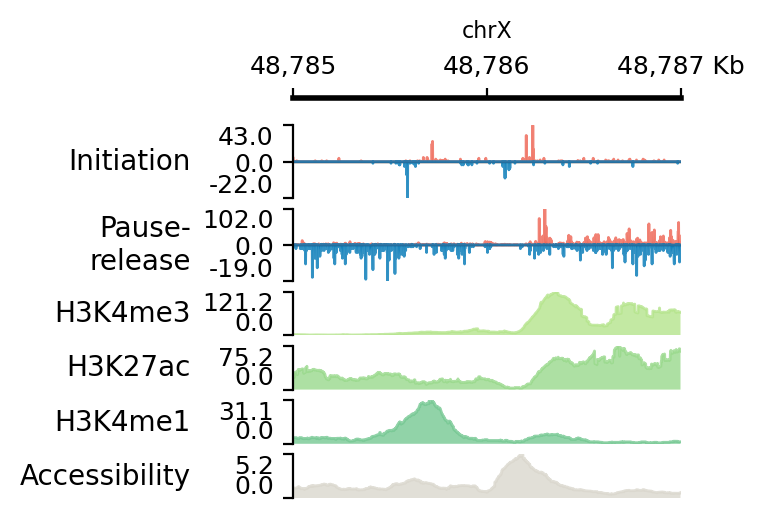

In [ ]:
gv_obj.plot("chrX", 48785315, 48787375, fig_width=2.5, height_scale_factor=0.55)

array([<Axes: title={'center': 'chrX'}, ylabel='Initiation'>,
       <Axes: ylabel='Pause-\nrelease'>, <Axes: ylabel='H3K4me3'>,
       <Axes: ylabel='H3K27ac'>, <Axes: ylabel='H3K4me1'>,
       <Axes: ylabel='Accessibility'>], dtype=object)

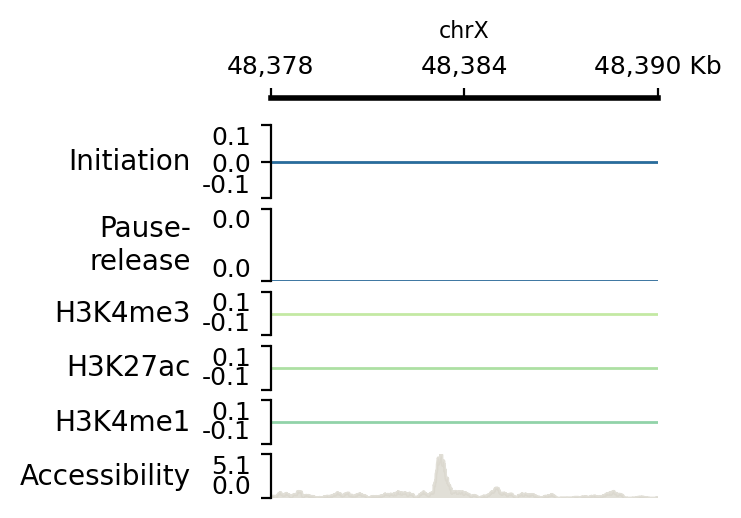

In [ ]:
gv_obj.plot("chrX", 48378194, 48389949, fig_width=2.5, height_scale_factor=0.55)

In [ ]:
k562_bin_counts_file = get_bioqueue_file("{{History:12184-Acc-NecessaryNotSufficient-K562.tsv.gz}}")
k562_bin_counts = pd.read_csv(k562_bin_counts_file, sep="\t", quotechar="'")
k562_log_bins = np.log1p(k562_bin_counts)
k562_bin_counts.head()

,accessibility,initiation,pausing,H3K4me3,H3K27ac,H3K4me1,Pausing,accessibility-DNase
0,3.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0
1,7.0,0.0,16.0,2.0,1.0,1.0,0.0,10.0
2,22.0,0.0,24.0,0.0,1.0,3.0,3.0,18.0
3,36.0,0.0,45.0,3.0,3.0,2.0,2.0,33.0
4,20.0,0.0,51.0,1.0,0.0,1.0,3.0,22.0


In [8]:
k562_log_bins.shape

(6039954, 8)

In [ ]:
gm12878_bin_counts_file = get_bioqueue_file("{{History:12197-Acc-NecessaryNotSufficient-GM12878.tsv.gz}}")
gm12878_bin_counts = pd.read_csv(gm12878_bin_counts_file, sep="\t", quotechar="'")
gm12878_log_bins = np.log1p(gm12878_bin_counts)
gm12878_bin_counts.head()

,accessibility,initiation,H3K4me3,H3K27ac,H3K4me1,Pausing,accessibility-DNase
0,16.0,0.0,0.0,0.0,2.0,0.0,7.0
1,8.0,0.0,0.0,0.0,1.0,0.0,6.0
2,5.0,0.0,0.0,0.0,4.0,0.0,8.0
3,12.0,0.0,3.0,0.0,2.0,0.0,4.0
4,12.0,0.0,0.0,0.0,0.0,0.0,7.0


In [10]:
gm12878_log_bins.head()

,accessibility,initiation,H3K4me3,H3K27ac,H3K4me1,Pausing,accessibility-DNase
0,2.833213,0.0,0.000000,0.0,1.098612,0.0,2.079442
1,2.197225,0.0,0.000000,0.0,0.693147,0.0,1.945910
2,1.791759,0.0,0.000000,0.0,1.609438,0.0,2.197225
3,2.564949,0.0,1.386294,0.0,1.098612,0.0,1.609438
4,2.564949,0.0,0.000000,0.0,0.000000,0.0,2.079442


In [11]:
gm12878_log_bins.shape

(6036339, 7)

initiation 7.074963197966044 3.6888794541139363 3.3860837438521076
Pausing 5.123963979403259 3.828641396489095 1.2953225829141637
H3K4me1 3.970291913552122 3.1780538303479458 0.7922380832041762
H3K4me3 5.652489180268651 3.367295829986474 2.2851933502821766
H3K27ac 4.919980925828125 3.258096538021482 1.661884387806643


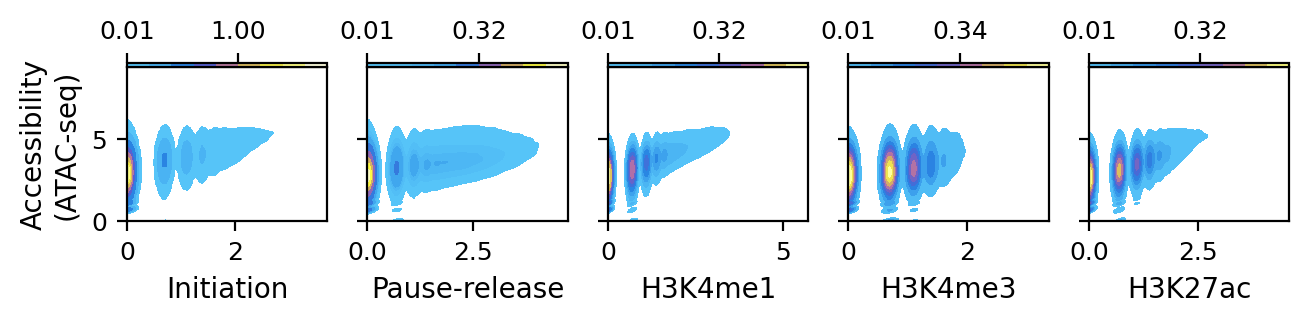

initiation 7.074963197966044 3.6888794541139363 3.3860837438521076
Pausing 5.123963979403259 3.828641396489095 1.2953225829141637
H3K4me1 3.970291913552122 3.1780538303479458 0.7922380832041762
H3K4me3 5.652489180268651 3.367295829986474 2.2851933502821766
H3K27ac 4.919980925828125 3.258096538021482 1.661884387806643


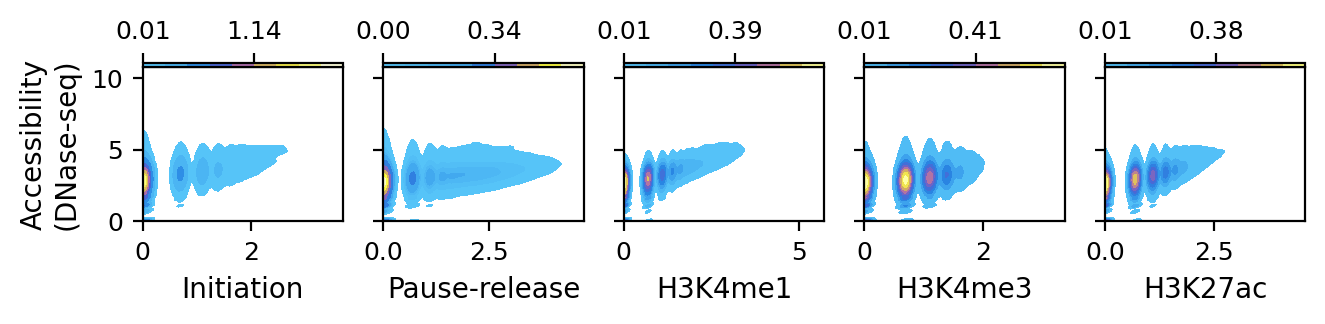

initiation 7.1049654482698426 3.912023005428146 3.1929424428416966
Pausing 7.4711706600580605 5.981414211254481 1.48975644880358
H3K4me1 4.59511985013459 3.9512437185814275 0.6438761315531623
H3K4me3 5.8888779583328805 4.2626798770413155 1.626198081291565
H3K27ac 4.454347296253507 3.2188758248682006 1.2354714713853068


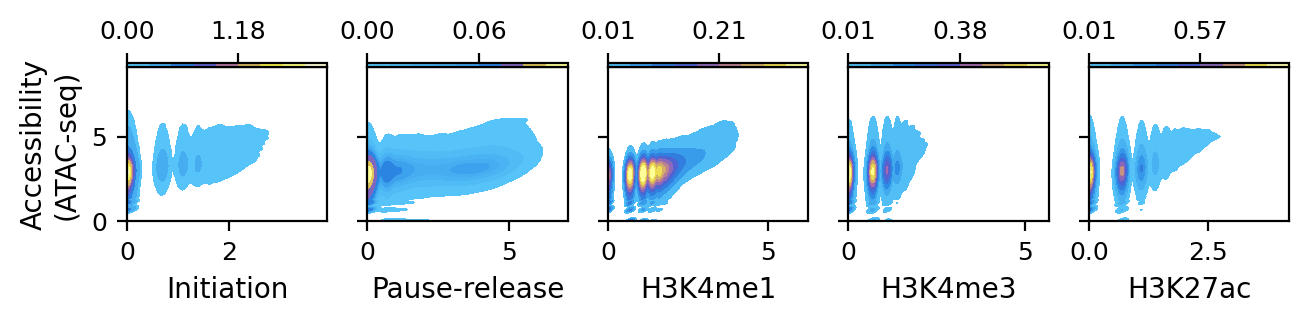

initiation 7.1049654482698426 3.912023005428146 3.1929424428416966
Pausing 7.4711706600580605 5.981414211254481 1.48975644880358
H3K4me1 4.59511985013459 3.9512437185814275 0.6438761315531623
H3K4me3 5.8888779583328805 4.2626798770413155 1.626198081291565
H3K27ac 4.454347296253507 3.2188758248682006 1.2354714713853068


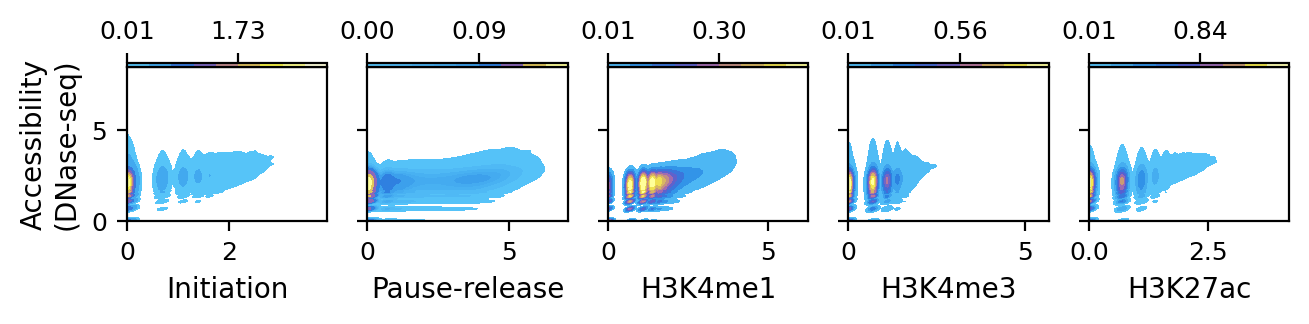

In [ ]:
n_samples = 1000000
random_seed = 299
appearance = {"fill": True, "cut": 0, "levels": 10, "cmap": BuYl}
to_plot = ("initiation", "Pausing", "H3K4me1", "H3K4me3", "H3K27ac")
accs = ("accessibility", "accessibility-DNase")
acc_name_mapping = {"accessibility": "Accessibility\n(ATAC-seq)", "accessibility-DNase": "Accessibility\n(DNase-seq)"}
readout_mapping = {"initiation": "Initiation", "Pausing": "Pause-release", "H3K4me1": "H3K4me1", "H3K4me3": "H3K4me3", "H3K27ac": "H3K27ac"}
for cell_line_idx, df in enumerate((k562_log_bins, gm12878_log_bins)):
    for j in range(2):
        acc = accs[j]
        fig, axs = plt.subplots(1, len(to_plot), figsize=(7.5, 1), sharey=True)
        for i, measurement in enumerate(to_plot):
            ax = axs[i]
            # add colorbar for each subplot
            cbar_ax = fig.add_axes([ax.get_position().x0, ax.get_position().y1, ax.get_position().width, 0.02])
            sns.kdeplot(
                y=acc, x=measurement, 
                data=df.loc[(df.accessibility>0) | (df[measurement]>0) ].sample(n=n_samples, random_state=random_seed),
                ax=ax, cbar=True, cbar_ax=cbar_ax, cbar_kws={"orientation": "horizontal", "format": "{x:.2f}", "spacing": "uniform"}, **appearance
            )
            print(measurement, df[measurement].quantile(0.999), df[measurement].quantile(0.99), df[measurement].quantile(0.999) - df[measurement].quantile(0.99))
            if abs(df[measurement].quantile(0.999) - df[measurement].quantile(0.99)) > 2:
                x_max = df[measurement].quantile(0.99)
                ax.set_xlim(None, x_max)
            elif abs(df[measurement].quantile(0.999) - df[measurement].quantile(0.99)) > 1.2:
                x_max = df[measurement].quantile(0.998)
                ax.set_xlim(None, x_max)
            ax.set_xlabel(readout_mapping[ax.get_xlabel()])
            ax.set_ylabel(acc_name_mapping[acc])

            # reduce # ticks on colorbars
            auto_ticks = cbar_ax.get_xticks()
            mid = int(len(auto_ticks) // 2)
            cbar_ax.set_xticks([auto_ticks[0], auto_ticks[mid], ])
            cbar_ax.xaxis.set_ticks_position("top")
        plt.show()